In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.datasets import reuters

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000,
                                                        test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
print(y_train)
category = np.max(y_train)+1
print("카테고리 개수 : ", category)

[ 3  4  3 ... 25  3 25]
카테고리 개수 :  46


In [6]:
print("train data : ",len(X_train))
print("test data : ",len(X_test))
print(X_train[0])

train data :  8982
test data :  2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
word_index =  reuters.get_word_index()
print(len(word_index))
word_index

557056/550378 [==============================] - 0s 0us/step
30979


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [9]:
index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key

In [10]:
index_to_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [11]:
" ".join([index_to_word[x] for x in X_train[0]]) 

'the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of of several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed of april 0 are 2 states will billion total and against 000 pct dlrs'

In [14]:
print("뉴스 기사 최대 길이 : ",max(len(x) for x in X_train))
print("뉴스 기사 최소 길이 : ",min(len(x) for x in X_train))
print("뉴스 기사 평균 길이 : ",sum(len(x) for x in X_train)/ len(X_train))

뉴스 기사 최대 길이 :  2376
뉴스 기사 최소 길이 :  13
뉴스 기사 평균 길이 :  145.5398574927633


<function matplotlib.pyplot.show(*args, **kw)>

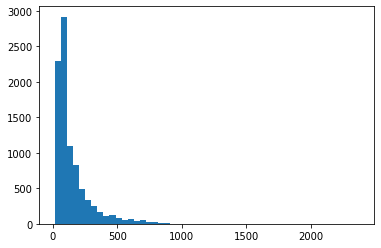

In [15]:
plt.hist([len(x) for x in X_train], bins=50)
plt.show

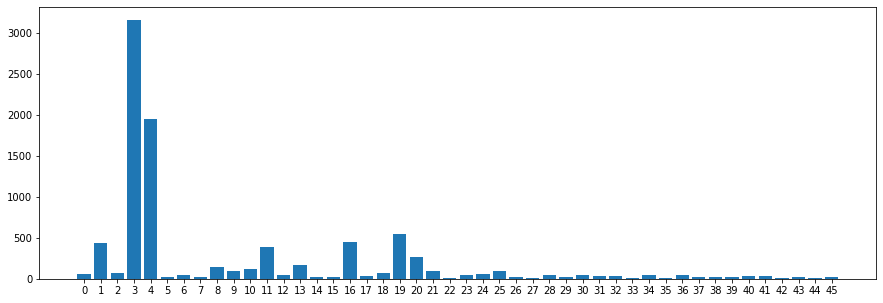

In [17]:
plt.figure(figsize=(15,5))
plt.bar(range(46), np.bincount(y_train))
plt.xticks(range(46))
plt.show()

## 데이터 전처리